In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from collections import deque
import random


num_of_episodes = 2000
learning_rate = 0.01
discount = .99
rList=[]
state_buffer = deque(maxlen=10000)

env = gym.make('FrozenLake-v0')

In [2]:
def show_play(env, sess):
    state = env.reset()
    env.render()
    reward_all = 0
    while True:
        action = np.argmax(sess.run(Qpred, feed_dict={X:one_hot(state)}))
        state, reward, done, info = env.step(action)
        env.render()
        print("State: ", state, "Action: ", action,"Reward: ", reward, "Info: ", info)
        reward_all += reward
        if done:
            break
    return reward

In [3]:
size_in = env.observation_space.n
size_out = env.action_space.n

X = tf.placeholder(tf.float32, [None, size_in])
Y = tf.placeholder(tf.float32)
A = tf.placeholder(tf.float32)

layer1 = tf.layers.dense(X, 32, activation=tf.nn.relu)
Qpred = tf.layers.dense(layer1, size_out)

cost = tf.reduce_sum(tf.square(Y*A - Qpred*A))
train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

def one_hot(x):
    return np.identity(16)[x:x+1]

Success rate: 0.562


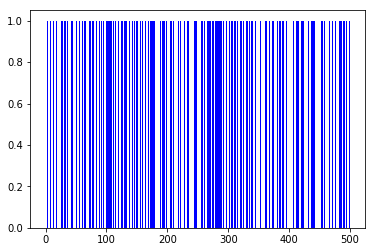


SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
('State: ', 0, 'Action: ', 0, 'Reward: ', 0.0, 'Info: ', {'prob': 0.3333333333333333})
  (Left)
SFFF
FHFH
FFFH
HFFG
('State: ', 0, 'Action: ', 0, 'Reward: ', 0.0, 'Info: ', {'prob': 0.3333333333333333})
  (Left)
SFFF
FHFH
FFFH
HFFG
('State: ', 0, 'Action: ', 0, 'Reward: ', 0.0, 'Info: ', {'prob': 0.3333333333333333})
  (Left)
SFFF
FHFH
FFFH
HFFG
('State: ', 0, 'Action: ', 0, 'Reward: ', 0.0, 'Info: ', {'prob': 0.3333333333333333})
  (Left)
SFFF
FHFH
FFFH
HFFG
('State: ', 0, 'Action: ', 0, 'Reward: ', 0.0, 'Info: ', {'prob': 0.3333333333333333})
  (Left)
SFFF
FHFH
FFFH
HFFG
('State: ', 4, 'Action: ', 0, 'Reward: ', 0.0, 'Info: ', {'prob': 0.3333333333333333})
  (Left)
SFFF
FHFH
FFFH
HFFG
('State: ', 0, 'Action: ', 0, 'Reward: ', 0.0, 'Info: ', {'prob': 0.3333333333333333})
  (Left)
SFFF
FHFH
FFFH
HFFG
('State: ', 0, 'Action: ', 0, 'Reward: ', 0.0, 'Info: ', {'prob': 0.3333333333333333})
  (Left)
SFFF
FHFH
FFFH
HFFG
('State: ', 0, 'Action

In [4]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(num_of_episodes):

        s = env.reset()
        e = 1. / ((step / 50) + 10)
        rAll = 0
        done = False

        while not done:
            Qs = sess.run(Qpred, feed_dict={X:one_hot(s)})
            
            if np.random.rand(1) < e:
                a = env.action_space.sample()
            else:
                a = np.argmax(Qs)     
            
            s1, reward, done, info = env.step(a)
            
            if done:
                Qs[0,a] = reward
            else:
                Qs1 = sess.run(Qpred, feed_dict={X:one_hot(s1)})
                Qs[0,a] = reward + discount * np.max(Qs1)
                            
            state_buffer.append([s,Qs[0],a])
            
            if len(state_buffer) > 100:
                mini_batch = random.sample(state_buffer, 100)
                state_array = np.array([one_hot(x[0])[0] for x in mini_batch])
                reward_array = np.array([x[1] for x in mini_batch])
                action_array = np.array([np.identity(4)[x[2]] for x in mini_batch])
                sess.run(train, feed_dict={X:state_array, Y:reward_array, A:action_array})
            
            rAll += reward
            s = s1
        rList.append(rAll)
    rList = rList[1500:]
    print("Success rate: " + str(sum(rList) / len(rList)))
    plt.bar(range(len(rList)), rList, color="blue")
    plt.show()
    
    show_play(env, sess)